In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline 

#### Демонстрация центральной предельной теоремы (ЦПТ):
1. распределение выборочных средних нормально  
2. средние значения из средних = среднее ГС  
3. стандартная ошибка среднего:
$$
se = \frac{sigma}{корень(n)}\
$$
где sigma - стандартное отклонение ГС  
если n > 30, то:
$$
se = \frac{sigv}{корень(n)}\
$$
где sigv - стандартное отклонение выборки

важное свойство ЦПТ:  
*при увеличении размеров выборок и их повторных извлечениях*  
*выборочное распределение средних этих выборок будет нормальным*  
https://gallery.shinyapps.io/CLT_mean/  
  
*создаем ГС с нормальным распределением*

In [4]:
mu, sigma = 100, 10 # mean and standard deviation
population = np.random.normal(mu, sigma, 10000).round(2)
np.mean(population) # определяем среднее

99.889119

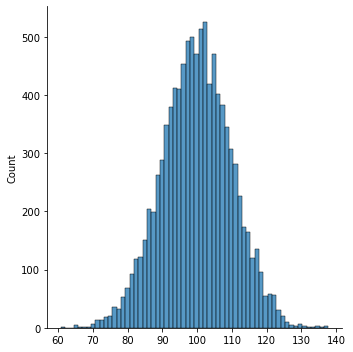

In [5]:
sns.displot(population, kde = False)

*создаем выборку*

In [6]:
sample_size = 30
sample = np.random.choice(population, sample_size, False)

In [7]:
population.std()

9.96677502574624

*делаем 1000 выборок и собираем среднее выборок в один массив*

In [8]:
sample_mean=[]
n = 1000
for i in range(n):
    sample = np.random.choice(population, sample_size, False)
    sample_mean.append(sample.mean())

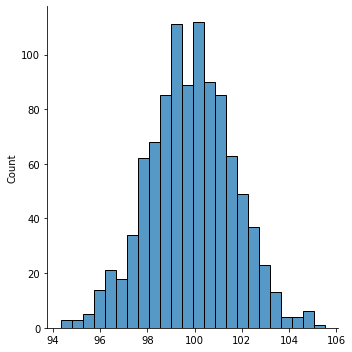

In [9]:
sns.displot(sample_mean, kde = False)

In [10]:
# среднее из средних
np.mean(sample_mean)

99.830118

In [11]:
# используем в числителе std ГС
se = population.std()/(sample_size**0.5)
se

1.819675835726783

In [12]:
np.std(sample_mean)

1.7919106497033959

Правило трех сигм  - 100% наблюдений  
Правило 1.96 сигм - 95% наблюдений  
$$
se = \frac{sigma}{корень(n)}\
$$
где sigma стандартное отклонение ГС

##### получаем доверительный интервал
*используем std средних*

In [13]:
population.mean() + 1.96*np.std(sample_mean)

103.40126387341866

In [14]:
population.mean() - 1.96*np.std(sample_mean)

96.37697412658133

*используем стандартную ошибку среднего*

In [15]:
population.mean() + 1.96 * se

103.45568363802448

In [16]:
population.mean() - 1.96 * se

96.3225543619755

#### как устроена реальность?
*в реальности всего лишь одна выборка*

In [17]:
sample_real = np.random.choice(population, sample_size, False)

In [18]:
sample_real

array([ 95.79,  93.39,  92.14,  89.06, 102.89, 108.95, 101.46,  84.39,
       100.4 , 101.5 ,  96.97,  96.06, 100.3 ,  83.22, 117.04,  82.71,
        92.64,  99.55, 103.22,  96.24,  99.18, 104.22, 106.73, 115.8 ,
       103.14,  94.87,  92.58, 114.84, 100.86,  87.61])

In [19]:
sample_real.mean()

98.59166666666667

*мы знаем, что если бы мы многократно повторяли эксперимент*  
*то наши средние были бы распределены нормально с std = se*

In [62]:
sample_real.std()

9.279028900339375

$$
se= \frac{sigv}{корень(n)}\
$$
где sigv стандартное отклонение выборки

In [20]:
se = sample_real.std()/(sample_size**0.5)

In [21]:
se

1.8464051248805569

In [22]:
sample_real.mean() + 1.96 * se

101.21528737809922

In [23]:
sample_real.mean() - 1.96 * se

93.97737928856745

*таким образом, среднее ГС = 99.9*  
*среднее отдельной выборки = 97.5*  
*доверительный интервал выборки [93.9 101.1]*  
*таким образом доверительный интервал включает среднее ГС*  
*для 99% доверительного интервала множитель 2.58*

*python фунуция расчет доверительного интервала*

In [31]:
import scipy.stats as st
import statsmodels.stats.api as sms

In [32]:
st.t.interval(0.95, len(sample_real)-1, loc=np.mean(sample_real), scale=st.sem(sample_real))

(95.28530328992701, 101.89803004340632)

In [33]:
sms.DescrStatsW(sample_real).tconfint_mean()

(95.28530328992701, 101.89803004340632)

*расчет p-уровня значимости*  
https://gallery.shinyapps.io/dist_calc/

#### Важно:
- p-уровень значимости не говорит о силе эффекта  
- если получили уровень значимости выше порога – это не значит, что нулевая
гипотеза верна. Просто такой уровень значимости не позволяет нам её
отклонить.